## Libraries

In [55]:
# Import libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore')

## Load Data

In [56]:
# load the dataset
main_data = pd.read_excel('/content/Databank-wide.xlsx', sheet_name = 'Data')
# check the shape of the data
main_data.shape

(642, 1235)

In [57]:
# data.head()
# select countries of interesy
selected_countries = ['Argentina', 'Brazil', 'Cameroon', 'Canada', 'China', 'Egypt, Arab Rep.',
                      'France', 'India', 'Israel', 'Japan', 'Netherlands',  'Nigeria', 
                      'Russian Federation', 'United Kingdom', 'United States']
# filter out the countries
data = main_data[main_data["countrynewwb"].isin(selected_countries)].reset_index()

## Feature Selection

In [141]:
data.head()

,index,countrynewwb,codewb,year,pop_adult_l1,regionwb21_hi,incomegroupwb21,developinggroupwb21_oecd,incomegroupwb21_lmh,fid,account_t_d,fin1_t_d,fin1_1ab,fin1_1a,fin1_1b,fin7_t_d,fin8_t,fin8a,fin8a_s,fin8b,fin8b_s,fin2_t_d,fin4_t,fin4a,fin4a_s,fin2_7_t_d,fin4_8_t,fin4a_8a,fin4a_8a_s,fin6_t,fin6_t_s,fin5,fin5_s,fin9_t_s,fin9N_10N_t_d,fin9N_10N_t_s,fin9a,fin9a_s,fin10_t_s,fin10a,fin10a_s,fin10b,fin10b_s,fin11_1,fin11a,fin11a_s,fin11b,fin11b_s,fin11f,fin11f_s,fin11c,fin11c_s,fin11d,fin11d_s,fin11e,fin11e_s,fin11g,fin11g_s,fin13a_t_2014_s,fin13b_t_2014_s,fin68a_2011,mobileaccount_t_d,fin13a,fin13a_s,fin13b,fin13b_s,fin13d,fin13d_s,fin10b_13b,fin10b_13b_s,Internet,Own_phone,save_any,fin17a_t_d,fin17a1_d,fin17a_17a1_d,fin17c_d_2014,fin16_t_d,fin15_t_d_2017,fin17b_t_d,borrow_any,fin13c,fin22a_c_MM_d,fin22a_2014,fin20_t_d,fin22a_c_t_d,fin22c_t_d,fin21b_2014,fin22b_t_d,fin21_t_d_2017,fin19_t_2017,g20_t_d,g20_made_t_d,g20_receive_t_d,fin14b_t_d,fin14a_t_d,fin14a1_d,fin4a_8a_14_1,fin14_2,fin14_2_s,fin14_1_d,fin14c_t,fin14c_t_s,fin14c2,fin14c2_s,fin14c_cash_t,fin14c_cash_t_s,merchant_pay,merchant_1st,merchant_1st_s,fin30_t_d,fin31a_t,fin31a_t_s,fin31b_t,fin31b_t_s,fin30_acc_t,fin30_acc_t_s,fin31b1,fin31c_t,fin31c_t_s,fin32_t_d,fin34b_t,fin34b_t_s,fin34e_t,fin34e_t_s,fin34a_t,fin34a_t_s,fin34a_34b_34e_t,fin34a_34b_34e_t_s,fin34d_t,fin34d_t_s,fin35,fin35_s,fin32_33_t_d,fin32_33_34b_t,fin32_33_34b_t_s,fin32_33_34e_t,fin32_33_34e_t_s,fin32_33_34a_t,fin32_33_34a_t_s,fin32_33_acc_t,fin32_33_acc_t_s,fin32_33_34d_t,fin32_33_34d_t_s,fin32_33_acc_35,fin32_33_acc_35_s,fin32_n33_t_d,fin32_n33_34b_t,fin32_n33_34b_t_s,fin32_n33_34e_t,fin32_n33_34e_t_s,fin32_n33_34a_t,fin32_n33_34a_t_s,fin32_n33_acc_t,fin32_n33_acc_t_s,fin32_n33_34d_t,fin32_n33_34d_t_s,fin32_n33_acc_35,fin32_n33_acc_35_s,fin37_t_d,fin37_39a_t,fin37_39a_t_s,fin37_39b_t,fin37_39b_t_s,fin37_39e_t,fin37_39e_t_s,fin37_acc_t,fin37_acc_t_s,fin37_39d_t,fin37_39d_t_s,fin38_t_d,fin38_39e_t,fin38_39e_t_s,fin38_39a_t,fin38_39a_t_s,fin38_39b_t,fin38_39b_t_s,fin38_acc_t,fin38_acc_t_s,fin38_39d_t,fin38_39d_t_s,fin37_38_t_d,fin37_38_39e_t,fin37_38_39e_t_s,fin37_38_39a_t,fin37_38_39a_t_s,fin37_38_39b_t,fin37_38_39b_t_s,fin37_38_acc_t,fin37_38_acc_t_s,fin37_38_39d_t,fin37_38_39d_t_s,fing2p_t_d,fing2p_mob_t,fing2p_mob_t_s,fing2p_card_t,fing2p_card_t_s,fing2p_fin_t,fing2p_fin_t_s,fing2p_acc_t,fing2p_acc_t_s,fing2p_cash_t,fing2p_cash_t_s,fin28_t_d,fin29c2_t,fin29c2_t_s,fin29_t,fin29_t_s,fin29c1_t,fin29c1_t_s,fin26_t_d,fin27c2_t,fin27c2_t_s,fin27_t,fin27_t_s,fin27c1_t,fin27c1_t_s,fin26_28_t_d,fin27c2_29c2_t,fin27c2_29c2_t_s,fin27_29_t,fin27_29_t_s,fin27c1_29c1_t,fin27c1_29c1_t_s,fin42_t_d,fin43e_t,fin43e_t_s,fin43a_t,fin43a_t_s,fin43_acc_t,fin43_acc_t_s,fin43d_t,fin43d_t_s,fin43b_t,fin43b_t_s,fin13_1a,fin13_1a_s,fin13_1b,fin13_1b_s,fin13_1c,fin13_1c_s,fin13_1d,fin13_1d_s,fin13_1e,fin13_1e_s,fin13_1f,fin13_1f_s,fin10_1a,fin10_1a_s,fin10_1b,fin10_1b_s,fin10_1c,fin10_1c_s,fin10_1d,fin10_1d_s,fin10_1e,fin10_1e_s,fin33_2014_d,fin34b_2014,fin34b_2014_s,fin34c_2014,fin34c_2014_s,fin34b_2014_acc,fin34b_2014_acc_s,fin34a_2014,fin34a_2014_s,fin5_a_2017,fin5_a_2017_s,fin5_2017_d,fin5_2017_d_s,fin44b3_d,fin44b1_d,fin44b2_d,fin44d3_d,fin44d2_d,fin44d1_d,fin44a3_d,fin44a2_d,fin44a1_d,fin44c3_d,fin44c2_d,fin44c1_d,fin45_1M_d,fin45_2M_d,fin45_3M_d,fin45_4M_d,fin45_1_3_d,fin45_1_2_d,fin45_1_1_d,fin24a_3_d,fin24a_32_d,fin24a_321_d,fin24a_N_d,fin24a_2_d,fin24a_1_d,fin24b_3_d,fin24b_32_d,fin24b_321_d,fin24b_2_d,fin24b_1_d,fin24_2_d,fin24_4_d,fin24_6_d,fin24_5_d,fin24_1_d,fin24_3_d,fin24_2_7_d,fin24_4_7_d,fin24_6_7_d,fin24_5_7_d,fin24_1_7_d,fin24_3_7_d,account_t_d_1,account_t_d_2,account_t_d_3,account_t_d_4,account_t_d_5,account_t_d_6,account_t_d_7,account_t_d_8,account_t_d_9,account_t_d_10,account_t_d_11,account_t_d_12,fin1_t_d_1,fin1_t_d_2,fin1_t_d_3,fin1_t_d_4,fin1_t_d_5,fin1_t_d_6,fin1_t_d_7,fin1_t_d_8,fin1_t_d_9,fin1_t_d_10,fin1_t_d_11,fin1_t_d_12,fin7_t_d_1,fin7_t_d_2,fin7_t_d_3,fin7_t_d_4,fin7_t_d_5,fin7_t_d_6,fin7_t_d_7,

In [142]:
# selected features to use for training - 28 features
col = ['countrynewwb', 'year', 'pop_adult_l1', 'regionwb21_hi', 'incomegroupwb21', 'account_t_d', 'fin1_t_d', 'fin7_t_d', 'fin8_t', 
      'fin2_t_d', 'fin4_t', 'fin2_7_t_d', 'fin4_8_t', 'fin6_t', 'fin6_t_s', 'fin5', 'fin5_s', 'mobileaccount_t_d', 'Internet', 'Own_phone', 
      'g20_t_d', 'g20_made_t_d', 'g20_receive_t_d', 'fin14b_t_d', 'fin34b_t_s', 'fin34d_t', 'fin5_a_2017']

<h2> Defining Variables and Justification for selected feature

---

* countrynewwb        -> country
* year                -> year
* pop_adult_l1        -> Adult Population
* regionwb21_hi       -> region of the country
* incomegroupwb21     -> income group of the country
* account_t_d         -> Account (% age 15+)
* fin1_t_d            -> Financial institution account (% age 15+)
* fin7_t_d            -> Owns a credit card (% age 15+)
* fin8_t              -> Used a credit card (% age 15+)
* fin2_t_d            -> Owns a debit card (% age 15+)
* fin4_t              -> Used a debit card (% age 15+)
* fin2_7_t_d          -> Owns a debit or credit card (% age 15+)
* fin4_8_t            -> Used a debit or credit card (% age 15+)
* fin6_t              -> Used a mobile phone or the internet to check account balance (% age 15+)
* fin6_t_s            -> Used a mobile phone or the internet to check account balance (% with a financial institution account, age 15+)
* fin5                -> Use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% age 15+)
* fin5_s              -> Use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% with a financial institution account, age 15+)
* mobileaccount_t_d   -> Mobile money account (% age 15+)
* Internet            -> Has access to the internet (% age 15+)
* Own_phone           -> Own a mobile phone (% age 15+)
* g20_t_d             -> Made or received a digital payment (% age 15+)
* g20_made_t_d        -> Made a digital payment (% age 15+)
* g20_receive_t_d     -> Received digital payments (% age 15+)
* fin14b_t_d          -> Used a mobile phone or the internet to buy something online (% age 15+)
* fin34b_t_s          -> Received wages: through a mobile phone (% of wage recipients, age 15+)
* fin34d_t            -> Received wages: in cash only (% age 15+)
* fin5_a_2017         -> Used a mobile phone or the internet to access a financial institution account (% age 15+)

<br>
<h2>Justification

---

* These features cover various aspects of financial inclusion, such as access to financial institutions (account_t_d, fin1_t_d), use of financial products (credit/debit cards), use of mobile banking (mobileaccount_t_d, fin6_t), and digital payments (g20_t_d).

* The selected features cover various dimensions of financial inclusion, such as access, usage, and quality of financial services. For example, access to financial services is covered by account_t_d and mobileaccount_t_d, usage of financial products is covered by credit/debit card ownership and usage, and quality of financial services is covered by digital payments.

* These selected features are commonly used in industry and academic research to measure financial inclusion. Therefore, selecting these features aligns with 
industry standards and facilitates comparability of results with other studies.

In summary, the selected features are relevant to the research question, cover different dimensions of financial inclusion, are available in the data, and align with industry standards. These justifications support the decision to select these features for analysis


<h2>Features Category

---

1. Financial inclusion features:
* Account (% age 15+)
* Financial institution account (% age 15+)
* Owns a credit card (% age 15+)
* Used a credit card (% age 15+)
* Owns a debit card (% age 15+)
* Used a debit card (% age 15+)
* Owns a debit or credit card (% age 15+)
* Used a debit or credit card (% age 15+)
* Used a mobile phone or the internet to check account balance (% age 15+)
* Used a mobile phone or the internet to check account balance (scaled)
* Use a mobile phone or the internet to make payments (% age 15+)
* Use a mobile phone or the internet to make payments (scaled)
* Mobile money account (% age 15+)
* Made or received a digital payment (% age 15+)
* Made a digital payment (% age 15+)
* Received digital payments (% age 15+)
* Used a mobile phone or the internet to buy something online (% age 15+)
* Received wages: through a mobile phone (% of wage earners)

2. Technology access features:
* Has access to the internet (% age 15+)
* Own a mobile phone (% age 15+)

3. Socio-economic features:
* Income group of the country
* Population aged 15+ with at least a lower-secondary education (pop_adult_l1)
* Region of the country (regionwb21_hi)
* Received wages: in cash only (% age 15+)
* Used a mobile phone or the internet to access financial services (2017)
* Used a mobile phone or the internet to access financial services (2017, scaled).

In [143]:
df = data[col]

In [144]:
# df.isna().sum()

## Data Analysis

### Statistical Test

In [64]:
# ANOVA test to compare differences in financial inclusion between some countries
group1 = df[df['countrynewwb'] == 'Brazil']['fin1_t_d']
group2 = df[df['countrynewwb'] == 'Canada']['fin1_t_d']
group3 = df[df['countrynewwb'] == 'Egypt, Arab Rep.']['fin1_t_d']
group4 = df[df['countrynewwb'] == 'Nigeria']['fin1_t_d']
group5 = df[df['countrynewwb'] == 'Argentina']['fin1_t_d']
group6 = df[df['countrynewwb'] == 'China']['fin1_t_d']
group7 = df[df['countrynewwb'] == 'United Kingdom']['fin1_t_d']
group8 = df[df['countrynewwb'] == 'United States']['fin1_t_d']

f_statistic, p_value = f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

# Print results
print('F-Statistic:', f_statistic)
print('P-Value:', p_value)

if p_value < 0.05:
    print('There is a significant difference in financial inclusion between at least two of the countries.')
else:
    print('There is no significant difference in financial inclusion between the countries.')

F-Statistic: 45.765649199292845
P-Value: 2.339577520112275e-12
There is a significant difference in financial inclusion between at least two of the countries.


The Statistical test shows that there is significant diffences among the countries based on the percentage of financial inclusion.

### Exploratory Data Analysis

In [65]:
da = df.copy()
da = da.fillna(da.median())

da['year'] = da['year'].astype(int).astype(object)

# Data pre-processing
# Changing the dtype from object to float
float_col = ['account_t_d', 'fin1_t_d', 'fin7_t_d', 'fin8_t', 'fin2_t_d', 'fin4_t', 'fin2_7_t_d', 'fin4_8_t', 'fin6_t', 
 'fin6_t_s', 'fin5', 'fin5_s', 'mobileaccount_t_d', 'Internet', 'Own_phone', 'g20_t_d', 'g20_made_t_d', 'g20_receive_t_d', 'fin14b_t_d', 
 'fin34b_t_s', 'fin34d_t', 'fin5_a_2017', 'pop_adult_l1']
for col in float_col:
  da[col] = da[col].astype('float')

# Changing the dtype from object to int
da['pop_adult_l1'] = da['pop_adult_l1'].astype('int')

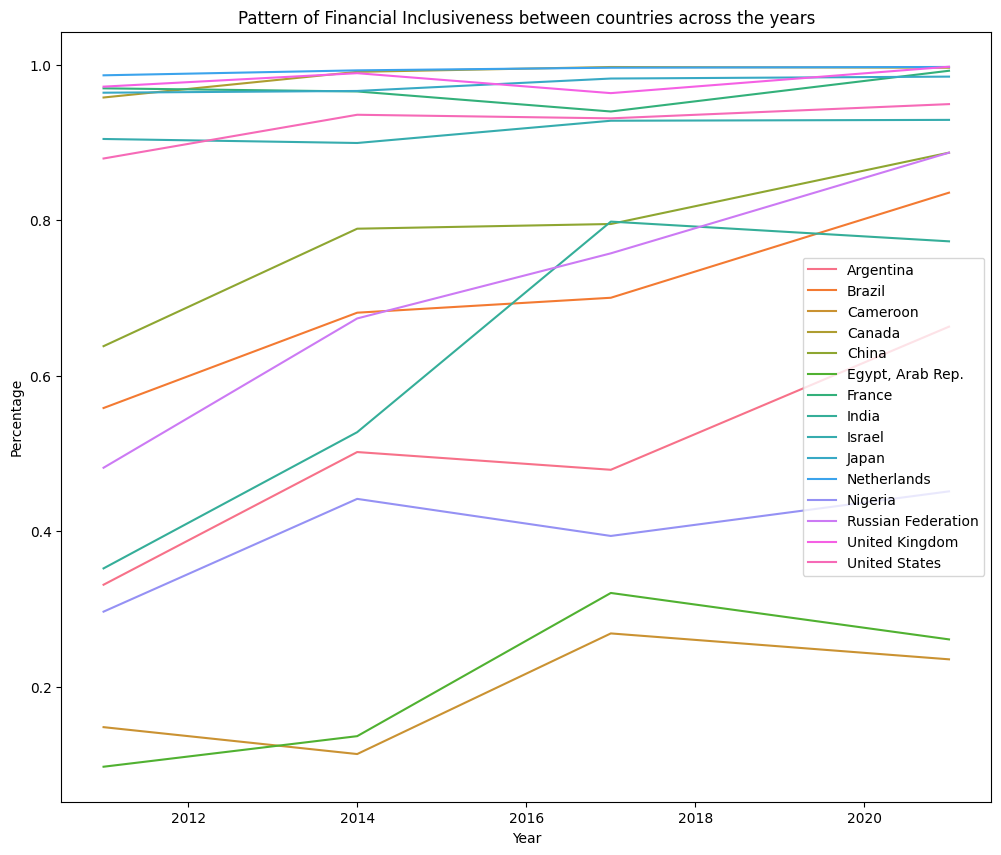

In [66]:
plt.figure(figsize = (12, 10))
sns.lineplot(data = da, y = 'fin1_t_d', x = 'year', hue = 'countrynewwb')
plt.title('Pattern of Financial Inclusiveness between countries across the years')
plt.legend(loc='center right')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

In [67]:
grouped_data = da.groupby('countrynewwb').mean()

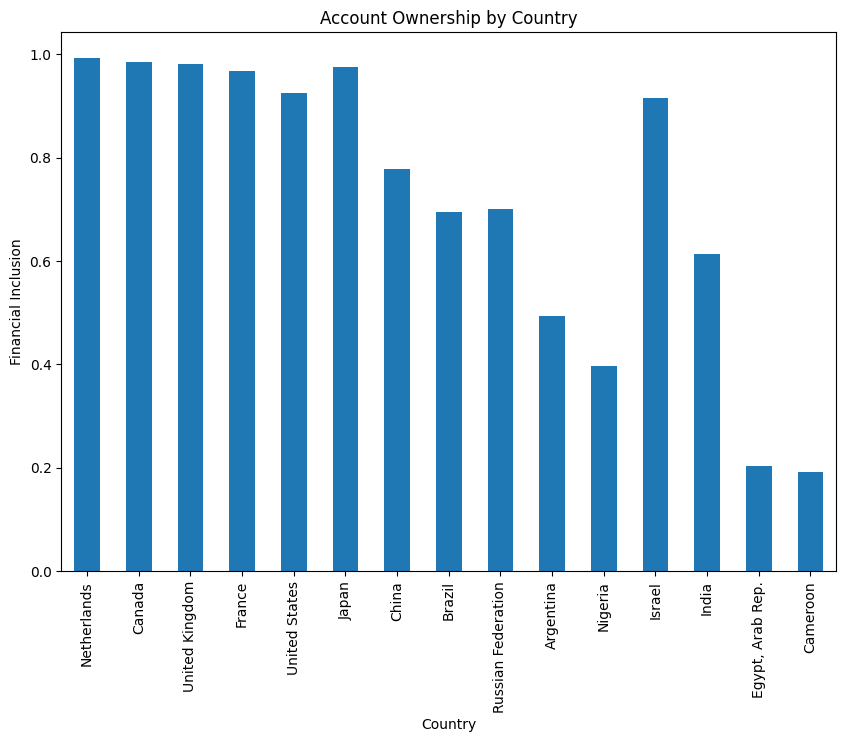

In [70]:
# Plot a bar chart of Financial Inclusion for each country
a = grouped_data.sort_values('fin2_t_d', ascending = False)
a['fin1_t_d'].plot(kind='bar', stacked=True, figsize = (10, 7))
plt.title('Account Ownership by Country')
plt.xlabel('Country')
plt.ylabel('Financial Inclusion')
plt.show()

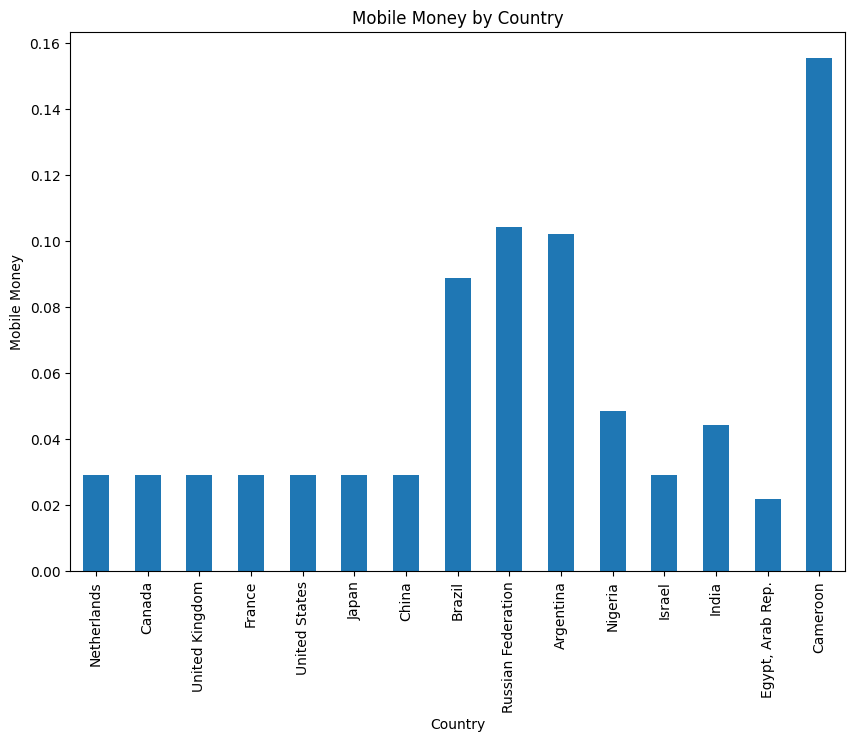

In [71]:
# Plot a bar chart of Mobile Money for each country
a = grouped_data.sort_values('fin2_t_d', ascending = False)
a['mobileaccount_t_d'].plot(kind='bar', stacked=True, figsize = (10, 7))
plt.title('Mobile Money by Country')
plt.xlabel('Country')
plt.ylabel('Mobile Money')
plt.show()

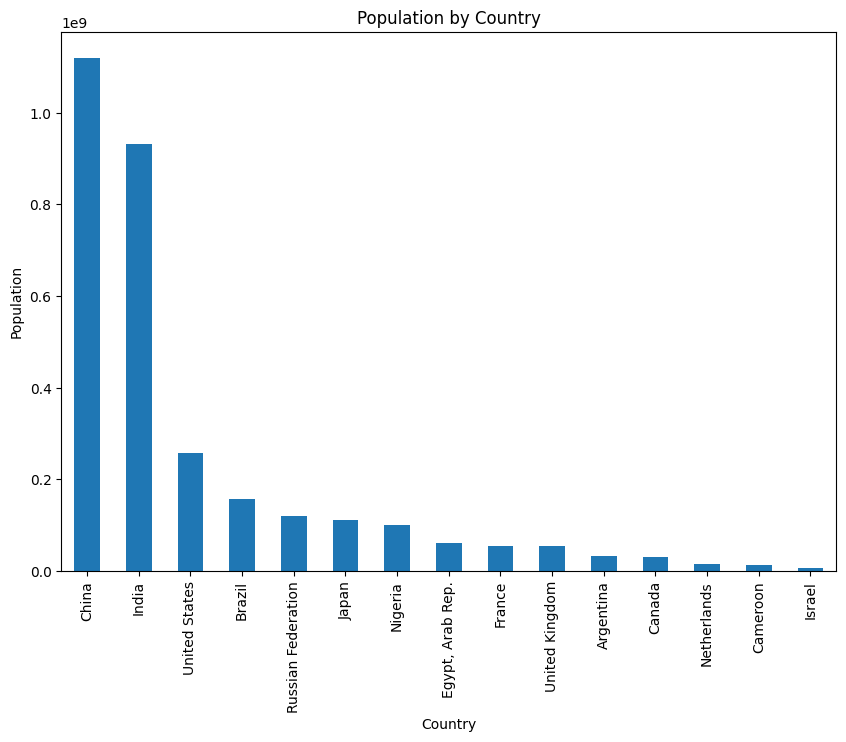

In [72]:
f = grouped_data.sort_values('pop_adult_l1', ascending = False)
f['pop_adult_l1'].plot(kind='bar', stacked=True, figsize = (10, 7))
plt.title('Population by Country')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()

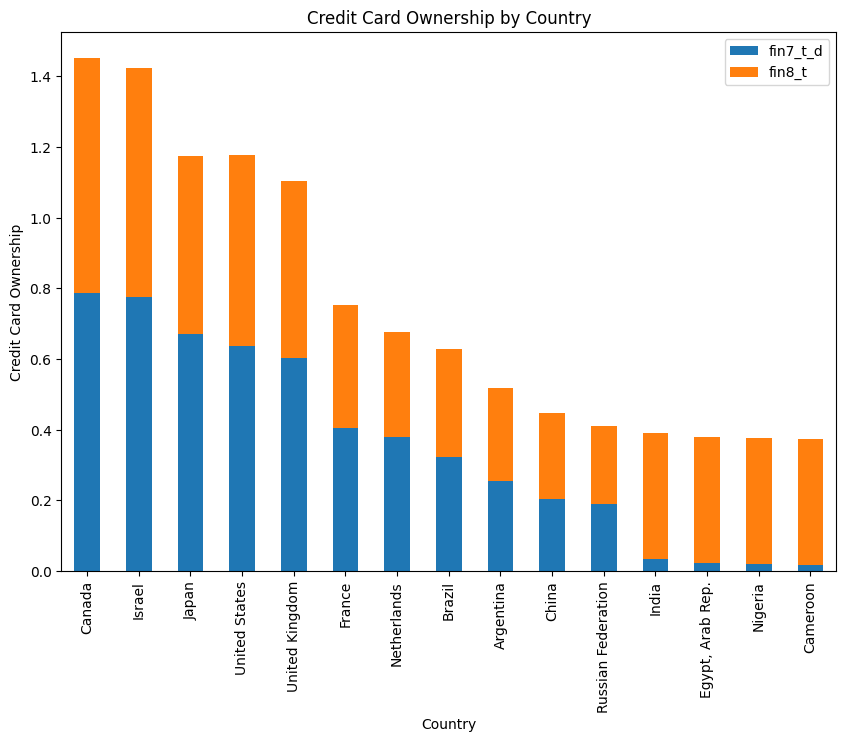

In [73]:
# Plot a stacked bar chart of credit card ownership for each country
b = grouped_data.sort_values('fin7_t_d', ascending = False)
b[['fin7_t_d', 'fin8_t']].plot(kind='bar', stacked=True, figsize = (10, 7))
plt.title('Credit Card Ownership by Country')
plt.xlabel('Country')
plt.ylabel('Credit Card Ownership')
plt.show()

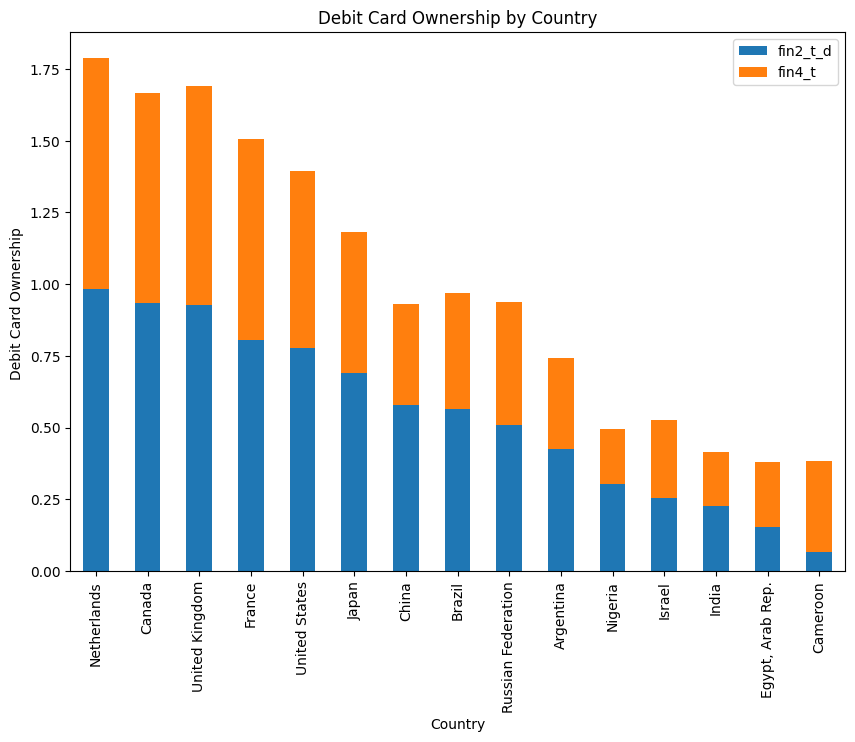

In [74]:
# Plot a stacked bar chart of debit card ownership for each country
c = grouped_data.sort_values('fin2_t_d', ascending = False)
c[['fin2_t_d', 'fin4_t']].plot(kind='bar', stacked=True, figsize = (10, 7))
plt.title('Debit Card Ownership by Country')
plt.xlabel('Country')
plt.ylabel('Debit Card Ownership ')
plt.show()

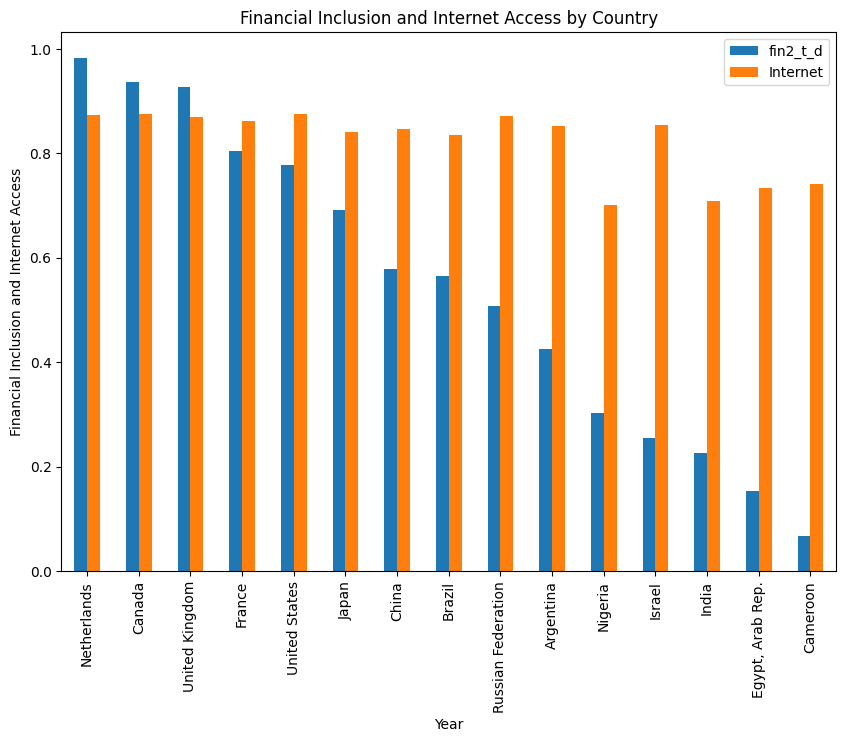

In [75]:
# Plot a bar chart of financial inclusion and internet access for each country
d = grouped_data.sort_values('fin2_t_d', ascending = False)
c[['fin2_t_d', 'Internet']].plot(kind='bar', figsize = (10, 7))
plt.title('Financial Inclusion and Internet Access by Country')
plt.xlabel('Year')
plt.ylabel('Financial Inclusion and Internet Access')
plt.show()

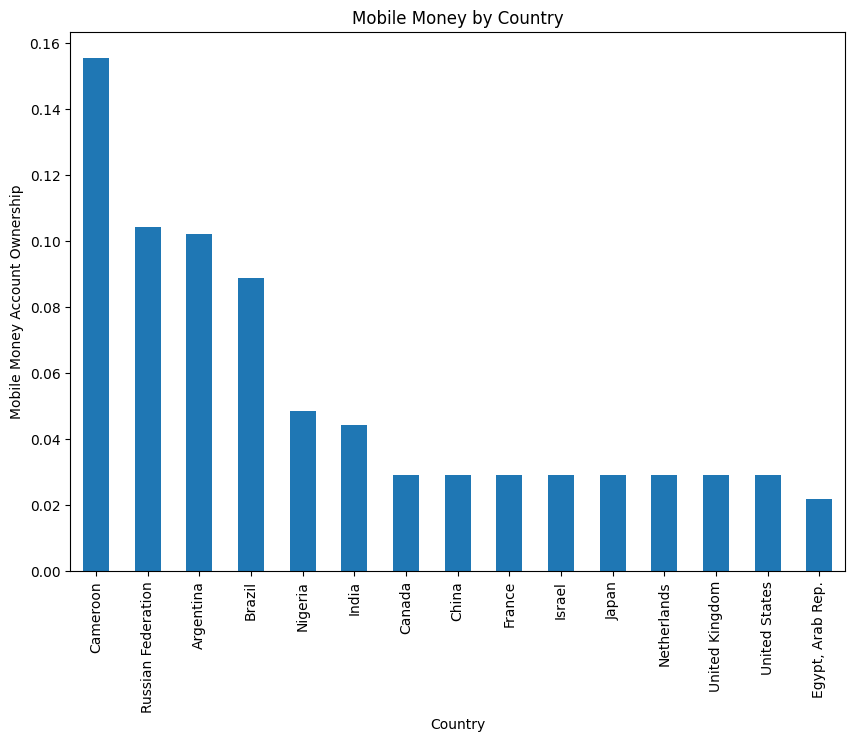

In [76]:
# Plot a bar plot of mobile money account ownership for each country
e = grouped_data.sort_values('mobileaccount_t_d', ascending = False)
e['mobileaccount_t_d'].plot(kind='bar', stacked=True, figsize = (10, 7))
plt.title('Mobile Money by Country')
plt.xlabel('Country')
plt.ylabel('Mobile Money Account Ownership')
plt.show()

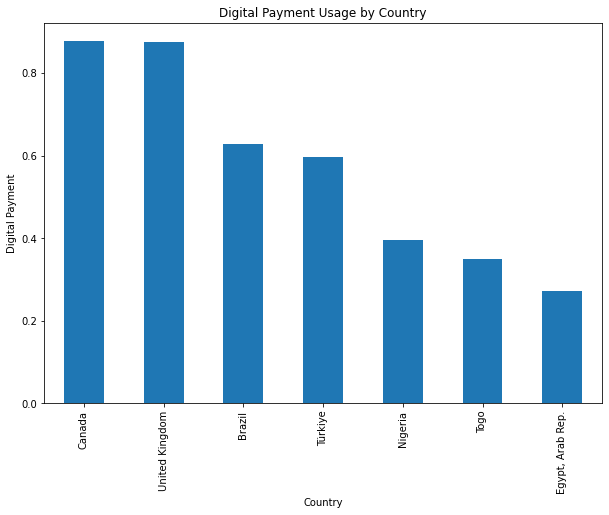

In [ ]:
# Plot a boxplot of digital payment usage for each country
f = grouped_data.sort_values('g20_t_d', ascending = False)
f['g20_t_d'].plot(kind='bar', figsize = (10, 7))
plt.title('Digital Payment Usage by Country')
plt.xlabel('Country')
plt.ylabel('Digital Payment')
plt.show()

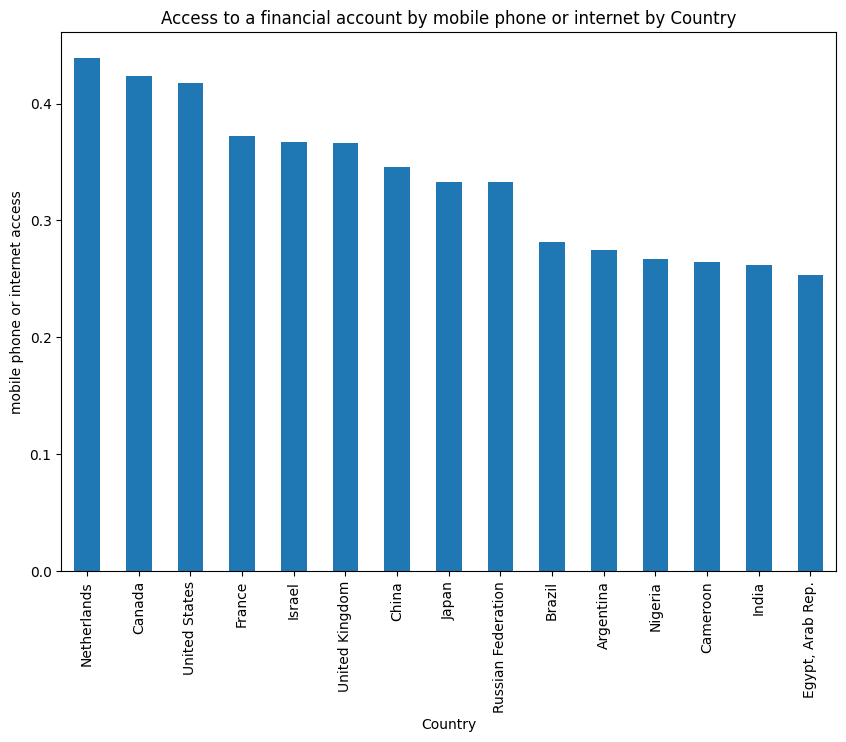

In [78]:
# Plot a boxplot of Access to a financial account by mobile phone or internet for each country
f = grouped_data.sort_values('fin5_a_2017', ascending = False)
f['fin5_a_2017'].plot(kind='bar', figsize = (10, 7))
plt.title('Access to a financial account by mobile phone or internet by Country')
plt.xlabel('Country')
plt.ylabel('mobile phone or internet access')
plt.show()

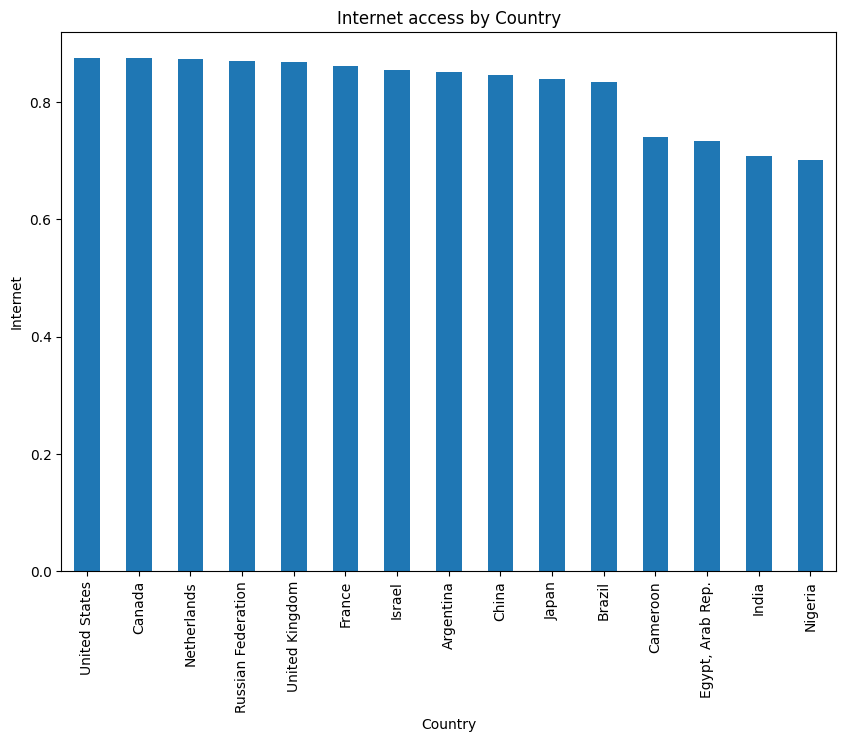

In [79]:
# Plot a boxplot of Internet Access for each country
f = grouped_data.sort_values('Internet', ascending = False)
f['Internet'].plot(kind='bar', figsize = (10, 7))
plt.title('Internet access by Country')
plt.xlabel('Country')
plt.ylabel('Internet')
plt.show()

## Machine Learning

In [145]:
# Data pre-processing

# Changing the dtype from object to float
float_col = ['account_t_d', 'fin1_t_d', 'fin7_t_d', 'fin8_t', 'fin2_t_d', 'fin4_t', 'fin2_7_t_d', 'fin4_8_t', 'fin6_t', 
 'fin6_t_s', 'fin5', 'fin5_s', 'mobileaccount_t_d', 'Internet', 'Own_phone', 'g20_t_d', 'g20_made_t_d', 'g20_receive_t_d', 'fin14b_t_d', 
 'fin34b_t_s', 'fin34d_t', 'fin5_a_2017']
for col in float_col:
  df[col] = df[col].astype('float')

# label encoding the country, income, and region
le_col = ['countrynewwb', 'regionwb21_hi', 'incomegroupwb21']
le = LabelEncoder()
for col in le_col:
  le.fit(df[col].values)
  df[col] = le.transform(df[col])

# Changing the dtype from object to int
df['year'] = df['year'].astype('int')

In [147]:
df = df[['incomegroupwb21', 'account_t_d', 'fin1_t_d', 'fin7_t_d', 'fin8_t',
       'fin2_t_d', 'fin4_t', 'fin2_7_t_d', 'fin4_8_t', 'fin6_t', 'fin6_t_s',
       'fin5', 'fin5_s', 'mobileaccount_t_d', 'Internet', 'Own_phone',
       'g20_t_d', 'g20_made_t_d', 'g20_receive_t_d', 'fin14b_t_d',
       'fin34b_t_s', 'fin34d_t', 'fin5_a_2017']]

In [148]:
# fill missing values with the median value of the distribution
df = df.fillna(df.median())

In [149]:
# seperating an entry for testing
test = df.loc[[3, 7, 11, 15, 19]]

# dropping the selected row
df = df.drop([3, 7, 11, 15, 19])

In [150]:
# preparing data for training
target = df['fin1_t_d']
not_in = [x for x in df.columns if x not in ['fin1_t_d']]
train = df[not_in]

In [151]:
# splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size = .1 , shuffle = True, random_state = 42)

In [152]:
# model training using simple linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_valid)

In [153]:
# model evaluation using RMSE
np.round(rmse(y_valid, pred, squared = False), 2), np.round(r2_score(y_valid, pred), 2)

(0.0, 1.0)

In [154]:
# Predicting the test data
y_pred = lr.predict(test[not_in])
y_test = test['fin1_t_d']
np.round(rmse(y_pred, y_test, squared = False), 2)

0.12